In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [3]:
# Importing Internbuddy_Dataset using read_csv()

data = pd.read_excel("/Users/brains/Documents/Arpit Bapna Movoix ML/internbuddy_data_v1.xlsx")
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [4]:
# Dataset shape
data.shape

(392, 24)

In [5]:
# Lets see summary of data
data.describe()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),Unnamed: 10,AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Current Year Of Graduation
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,0.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.375000,0.566327,0.461735,0.612245,0.403061,1.346939,1.045918,0.770408,NaN,0.015306,0.265306,0.035714,0.086735,0.178571,2018.867347
std,0.975237,0.905052,0.842336,0.911789,0.837602,1.071386,1.022976,0.966626,NaN,0.122924,0.715928,0.255377,0.401567,0.499360,2.280296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2018.750000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,1.000000,3.000000,2.000000,2.000000,2.000000,2023.000000


In [6]:
# Lets see info of variables and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
Unnamed: 10                   0 non-null float64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  378 non-null object
Degree                        380 non-null object
Stream   

In [7]:
# Including a column of Job Offered
data['job_offer'] = 'No'

In [8]:
# Checking for any null values in dataset

null = pd.isnull(data).sum(axis=0)
null = null[null > 0].sort_values(ascending=False)/len(data.index)
null

Unnamed: 10       1.000000
Performance_PG    0.737245
Performance_10    0.451531
Performance_12    0.415816
Performance_UG    0.137755
Stream            0.045918
Other skills      0.035714
Degree            0.030612
dtype: float64

In [9]:
# Dropping 'Unnamed: 10'
data = data.drop(['Unnamed: 10'],axis=1)

In [10]:
# Chaing data type from object to string

data['Application_ID'] = data['Application_ID'].astype(str)
data['Current City '] = data['Current City'].astype(str)
data['Other skills'] = data['Other skills'].astype(str)
data['Degree'] = data['Degree'].astype(str)
data['Current Year Of Graduation'] = data['Current Year Of Graduation'].astype(str)
data['Performance_PG'] = data['Performance_PG'].astype(str)
data['Performance_UG'] = data['Performance_UG'].astype(str)
data['Performance_12'] = data['Performance_12'].astype(str)
data['Performance_10'] = data['Performance_10'].astype(str)

In [11]:
## Extracting Percentage or CGPA of PG, UG, 12 and 10 Performance
# Performance_PG
data['Performance_PG'] = data['Performance_PG'].str.split("/")
data['cgpa_PG'] = data['Performance_PG'].str.get(0)
data['cgpa_PG']=data['cgpa_PG'].astype('float')

# Performance_UG
data['Performance_UG'] = data['Performance_UG'].str.split("/")
data['cgpa_UG'] = data['Performance_UG'].str.get(0)
data['cgpa_UG']=data['cgpa_UG'].astype('float')

# Performance_12
data['Performance_12'] = data['Performance_12'].str.split("/")
data['cgpa_12'] = data['Performance_12'].str.get(0)
data['cgpa_12']=data['cgpa_12'].astype('float')

# Performance_10
data['Performance_10'] = data['Performance_10'].str.split("/")
data['cgpa_10'] = data['Performance_10'].str.get(0)
data['cgpa_10']=data['cgpa_10'].astype('float')

In [12]:
# Changing CGPA of 10, 12, UG and PG to percentage if its less than 10

data.loc[data['cgpa_PG']>10,'PG_perc']=data['cgpa_PG']
data.loc[data['cgpa_PG']<=10,'PG_perc']=data['cgpa_PG'] * 10

data.loc[data['cgpa_UG']>10,'UG_perc']=data['cgpa_UG']
data.loc[data['cgpa_UG']<=10,'UG_perc']=data['cgpa_UG'] * 10

data.loc[data['cgpa_12']>10,'12_perc']=data['cgpa_12']
data.loc[data['cgpa_12']<=10,'12_perc']=data['cgpa_12'] * 10

data.loc[data['cgpa_10']>10,'10_perc']=data['cgpa_10']
data.loc[data['cgpa_10']<=10,'10_perc']=data['cgpa_10'] * 10

In [13]:
# Dropping Performance_',cgpa_'

data = data.drop(['Performance_PG','Performance_UG','Performance_12','Performance_10','cgpa_PG','cgpa_UG',
              'cgpa_12','cgpa_10'],axis=1)
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Other skills,Degree,Stream,Current Year Of Graduation,job_offer,Current City,PG_perc,UG_perc,12_perc,10_perc
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,No,Bangalore,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,No,Bangalore,NaN,85.5,92.20,96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,No,Bangalore,79.1,70.0,64.83,77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,No,Bangalore,NaN,68.6,76.00,84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,No,Bangalore,NaN,63.8,65.20,68.80


In [14]:
# Checking for any null values

null = pd.isnull(data).sum(axis=0)
null = null[null > 0].sort_values(ascending=False)/len(data.index)
null

PG_perc    0.737245
10_perc    0.451531
12_perc    0.415816
UG_perc    0.137755
Stream     0.045918
dtype: float64

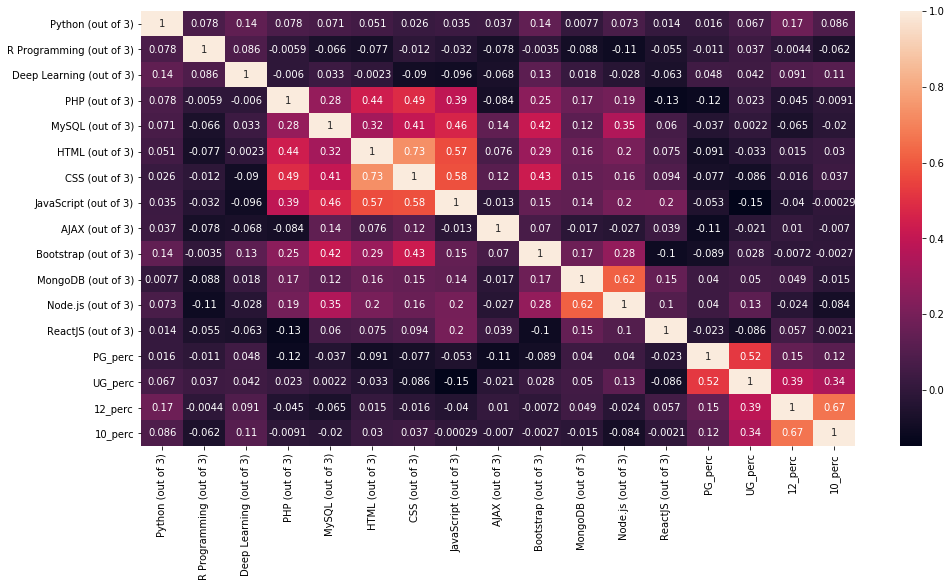

In [15]:
# Heatmap to see correlation between variables

# Correlation matrix
cor = data.corr()
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, annot=True)
plt.show()

# Using linear Regression, We can predict Nan values in 10, 12, UG & PG percentage 

In [16]:
data_lr = pd.DataFrame({'10_perc' : data['10_perc'],
                     '12_perc' : data['12_perc'],
                     'UG_perc' : data['UG_perc'],
                     'PG_perc' : data['PG_perc'],
                     'Python (out of 3)' : data['Python (out of 3)'],
                     'R Programming (out of 3)' : data['R Programming (out of 3)'],
                     'Deep Learning (out of 3)' : data['Deep Learning (out of 3)'],
                     'PHP (out of 3)' : data['PHP (out of 3)'],
                     'MySQL (out of 3)' : data['MySQL (out of 3)'],
                     'MongoDB (out of 3)' : data['MongoDB (out of 3)'],
                     'HTML (out of 3)' : data['HTML (out of 3)'],
                     'CSS (out of 3)' : data['CSS (out of 3)'],
                     'JavaScript (out of 3)' : data['JavaScript (out of 3)'],
                     'AJAX (out of 3)' : data['AJAX (out of 3)'],
                     'Bootstrap (out of 3)' : data['Bootstrap (out of 3)'],
                     'Node.js (out of 3)' : data['Node.js (out of 3)'],
                     'ReactJS (out of 3)' : data['ReactJS (out of 3)']})

data_lr = data_lr.dropna()
data_lr.head()

,10_perc,12_perc,UG_perc,PG_perc,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),MongoDB (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),Node.js (out of 3),ReactJS (out of 3)
2,77.60,64.83,70.0,79.1,3,0,1,2,2,0,2,0,2,0,0,0,0
8,93.00,70.00,70.0,80.0,3,0,0,0,0,0,2,2,0,0,0,0,0
21,85.85,80.50,35.6,37.6,1,1,0,0,0,0,0,0,0,0,0,0,0
25,76.00,84.30,75.0,83.5,2,0,0,0,0,0,2,0,0,0,0,0,0
30,81.00,80.00,70.0,80.0,2,2,0,0,0,0,2,2,0,0,0,0,0


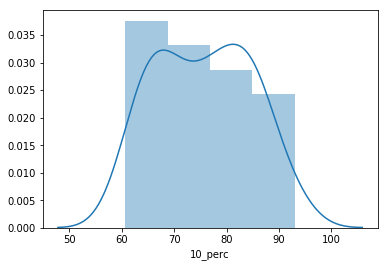

In [17]:
sns.distplot(data_lr['10_perc'])
plt.show()

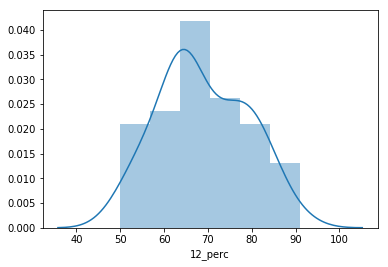

In [18]:
sns.distplot(data_lr['12_perc'])
plt.show()

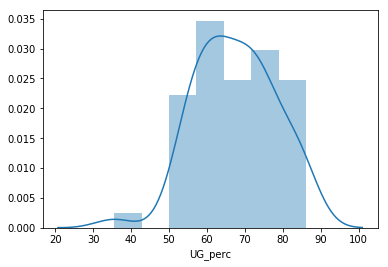

In [19]:
sns.distplot(data_lr['UG_perc'])
plt.show()

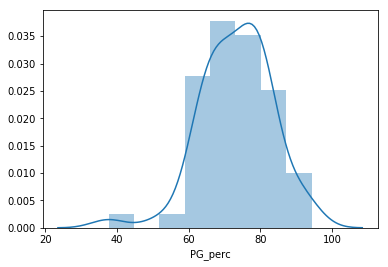

In [20]:
sns.distplot(data_lr['PG_perc'])
plt.show()

In [21]:
# Create a list of the variables that we need

var10 = ['Python (out of 3)','R Programming (out of 3)','Deep Learning (out of 3)', 'PHP (out of 3)', 
       'MySQL (out of 3)', 'MongoDB (out of 3)', 'HTML (out of 3)', 'CSS (out of 3)', 'JavaScript (out of 3)', 
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'Node.js (out of 3)', 'ReactJS (out of 3)']

# Spliting the x_train and y_train for 10_perc

x_train = data_lr[var10]
y_train = data_lr['10_perc']

# Fitting the linear model
rm = linear_model.LinearRegression()
rm.fit(x_train,y_train)

# Predicting the 10th percentage
for i in range (0,392):
    if(math.isnan(data.iloc[i, data.columns.get_loc('10_perc')])):
        data1=data.iloc[i:i+1, 2:15]
        pred=rm.predict(data1[var10])
        data['10_perc'][i]=float(pred)

In [22]:
# Create a list of the variables that we need

var12 = ['Python (out of 3)','R Programming (out of 3)','Deep Learning (out of 3)', 'PHP (out of 3)', 
       'MySQL (out of 3)', 'MongoDB (out of 3)', 'HTML (out of 3)', 'CSS (out of 3)', 'JavaScript (out of 3)', 
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'Node.js (out of 3)', 'ReactJS (out of 3)']

# Spliting the x_train and y_train for 12_perc
x_train = data_lr[var12]
y_train = data_lr['12_perc']

# Fitting the linear model
rm = linear_model.LinearRegression()
rm.fit(x_train,y_train)

# Predicting the 12th percentage
for i in range (0,392):
    if(math.isnan(data.iloc[i, data.columns.get_loc('12_perc')])):
        data1=data.iloc[i:i+1]
        pred=rm.predict(data1[var12])
        data['12_perc'][i]=float(pred)

In [23]:
# Create a list of the variables that we need

varUG = ['Python (out of 3)','R Programming (out of 3)','Deep Learning (out of 3)', 'PHP (out of 3)', 
       'MySQL (out of 3)', 'MongoDB (out of 3)', 'HTML (out of 3)', 'CSS (out of 3)', 'JavaScript (out of 3)', 
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'Node.js (out of 3)', 'ReactJS (out of 3)']

# Spliting the x_train and y_train for UG_perc
x_train = data_lr[varUG]
y_train = data_lr['UG_perc']

# Fitting the linear model
rm = linear_model.LinearRegression()
rm.fit(x_train,y_train)

# Predicting the UG percentage
for i in range (0,392):
    if(math.isnan(data.iloc[i, data.columns.get_loc('UG_perc')])):
        data1=data.iloc[i:i+1]
        pred=rm.predict(data1[varUG])
        data['UG_perc'][i]=float(pred)

In [24]:
# Create a list of the variables that we need

varPG = ['Python (out of 3)','R Programming (out of 3)','Deep Learning (out of 3)', 'PHP (out of 3)', 
       'MySQL (out of 3)', 'MongoDB (out of 3)', 'HTML (out of 3)', 'CSS (out of 3)', 'JavaScript (out of 3)', 
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'Node.js (out of 3)', 'ReactJS (out of 3)']

# Spliting the x_train and y_train for PG_perc
x_train = data_lr[varPG]
y_train = data_lr['PG_perc']

# Fitting the linear model
rm = linear_model.LinearRegression()
rm.fit(x_train,y_train)

# Predicting the PG percentage
for i in range (0,392):
    if(math.isnan(data.iloc[i, data.columns.get_loc('PG_perc')])):
        data1=data.iloc[i:i+1]
        pred=rm.predict(data1[varPG])
        data['PG_perc'][i]=float(pred)

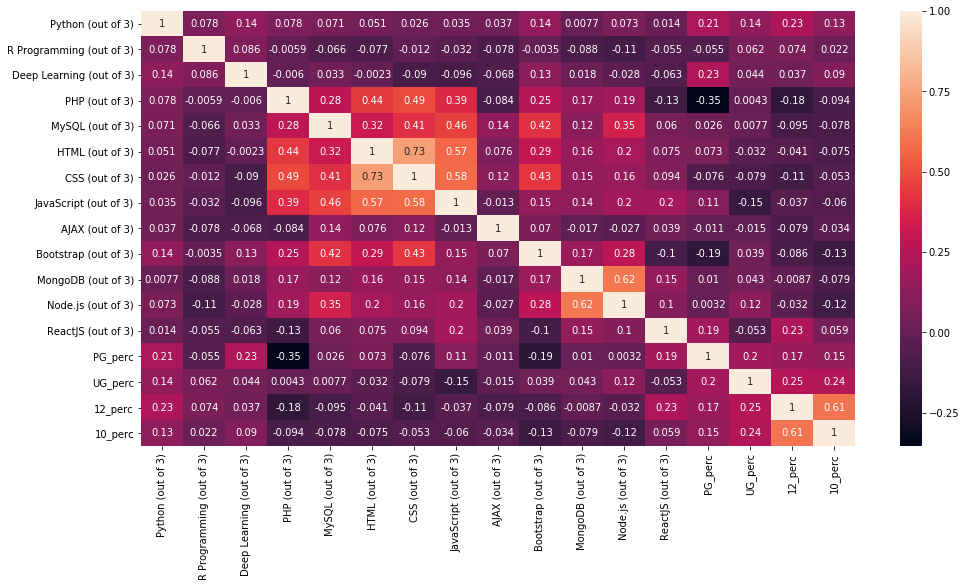

In [25]:
# Heatmap to see correlation between variables

# Correlation matrix
cor = data.corr()
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, annot=True)
plt.show()

In [26]:
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Other skills,Degree,Stream,Current Year Of Graduation,job_offer,Current City,PG_perc,UG_perc,12_perc,10_perc
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,No,Bangalore,60.297585,63.27815,62.567557,67.846792
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,No,Bangalore,71.498005,85.50000,92.200000,96.600000
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,No,Bangalore,79.100000,70.00000,64.830000,77.600000
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,No,Bangalore,77.779031,68.60000,76.000000,84.320000
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,No,Bangalore,72.508722,63.80000,65.200000,68.800000


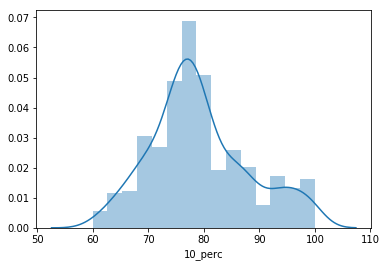

In [27]:
sns.distplot(data['10_perc'])
plt.show()

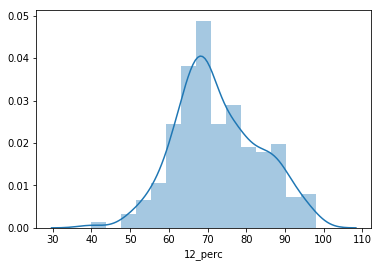

In [28]:
sns.distplot(data['12_perc'])
plt.show()

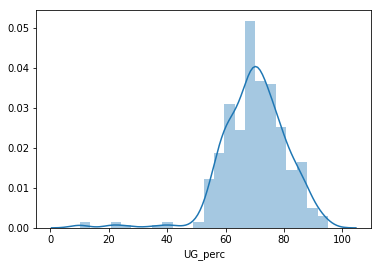

In [29]:
sns.distplot(data['UG_perc'])
plt.show()

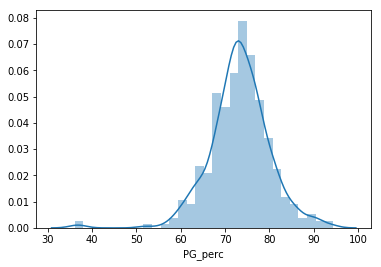

In [30]:
sns.distplot(data['PG_perc'])
plt.show()

In [31]:
data.describe()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),PG_perc,UG_perc,12_perc,10_perc
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.375000,0.566327,0.461735,0.612245,0.403061,1.346939,1.045918,0.770408,0.015306,0.265306,0.035714,0.086735,0.178571,73.294951,69.904249,72.524616,79.259126
std,0.975237,0.905052,0.842336,0.911789,0.837602,1.071386,1.022976,0.966626,0.122924,0.715928,0.255377,0.401567,0.499360,6.853502,11.182997,10.717856,8.869176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.100000,10.000000,40.000000,60.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.950000,63.369537,65.317997,74.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000780,70.000000,70.497905,77.793881
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.242007,76.825000,80.000000,84.365000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,94.300000,95.000000,98.000000,100.000000


In [32]:
# Extracting features out of Others skills

skills = data ["Other skills"]
colm = ['Android','Java','Data Analytics','Machine Learning','SQL','DBMS','Django','AngularJS',
        'NLP','Computer Vision','Artifical Intelligence','Power BI','Data Science','MS-Excel','OpenCV',
        'WordPress','C Programming','C++ Programming','Data Structures','MS-Office','Statistical Modeling']
    
    
a_dict = {}

for y in colm:
    
    list_a = [(y in x if type(x) == str else False) for x in skills]
    
    a_dict[y] = list_a

In [33]:
skills = pd.DataFrame(a_dict, columns=colm)
skills.head()

,Android,Java,Data Analytics,Machine Learning,SQL,DBMS,Django,AngularJS,NLP,Computer Vision,...,Power BI,Data Science,MS-Excel,OpenCV,WordPress,C Programming,C++ Programming,Data Structures,MS-Office,Statistical Modeling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,True,True,True,True,False,False,False,True,False,...,False,False,False,False,False,True,True,True,False,True
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [34]:
# Android,Java,Data Analytics,Machine Learning,SQL,Database Management System (DBMS),Django,
# Angular 7.0,AngularJS,Natural Language Processing (NLP),Computer Vision,Artifical Intelligence,Power BI,
# Data Science,MS-Excel,OpenCV,WordPress,C Programming, C++ Programming,Data Structures,MS-Office,Statistical Modeling

In [35]:
data = pd.merge(data, skills,left_index=True, right_index=True)

In [36]:
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Power BI,Data Science,MS-Excel,OpenCV,WordPress,C Programming,C++ Programming,Data Structures,MS-Office,Statistical Modeling
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,False,False,False,False,False,False,False,False,False,False
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,False,True,False,False,False,False,False,False,False,False
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,False,False,False,False,False,True,True,True,False,True
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,False,False,False,False,False,False,False,False,False,False
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,False,False,False,True,False,False,True,False,False,False


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 46 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  392 non-null object
Degree                        392 non-null object
Stream                        374 non-null object
Current 

In [38]:
data.describe()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),PG_perc,UG_perc,12_perc,10_perc
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.375000,0.566327,0.461735,0.612245,0.403061,1.346939,1.045918,0.770408,0.015306,0.265306,0.035714,0.086735,0.178571,73.294951,69.904249,72.524616,79.259126
std,0.975237,0.905052,0.842336,0.911789,0.837602,1.071386,1.022976,0.966626,0.122924,0.715928,0.255377,0.401567,0.499360,6.853502,11.182997,10.717856,8.869176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.100000,10.000000,40.000000,60.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.950000,63.369537,65.317997,74.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000780,70.000000,70.497905,77.793881
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.242007,76.825000,80.000000,84.365000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,94.300000,95.000000,98.000000,100.000000


In [39]:
# Data scientist need to have mandatory skills which are : Python, SQL, MySQL, Deep Learning, Data Analytics, 
# Machine Learning, Power BI, Computer Vision, Hadoop, R Programming, NLP, MS-Office, Tableau, OpenCV

data.loc[((data['Python (out of 3)']>1) & 
         (data['R Programming (out of 3)']>1) &
         (data['Deep Learning (out of 3)']>0)) &
        ((data['Other skills'].str.find('Data Analytics')>0) &
         (data['Other skills'].str.find('Machine Learning')>0) |
         (data['Other skills'].str.find('NLP')>0) |
         (data['Other skills'].str.find('Big Data Analytics')>0) |
         (data['Other skills'].str.find('Computer Vision')>0) |
         (data['Other skills'].str.find('OpenCV')>0) |
         (data['Other skills'].str.find('Statistical Modeling')>0) |
         (data['Other skills'].str.find('Artifical Intelligence')>0)) &
         (data['10_perc']>=65) & (data['12_perc']>=65) & (data['UG_perc']>=65),'job_offer']="Data Science"

In [40]:
# Web Developer need to have mandatory skills which are : PHP, HTML, CSS, SQL, MySQL, JavaScript, AJAX, Bootstrap
# MongoDB,NodeJS, AngularJS, ReactJS, DBMS,etc


data.loc[((data['PHP (out of 3)']>0) & 
         ((data['MySQL (out of 3)']>1) |
          (data['MongoDB (out of 3)']>1)) &
          (data['HTML (out of 3)']>1) &
          (data['CSS (out of 3)']>1) &
          (data['JavaScript (out of 3)']>1) &
          (data['AJAX (out of 3)']>1) &
          (data['Bootstrap (out of 3)']>1) |
          ((data['Node.js (out of 3)']>0) |
          (data['ReactJS (out of 3)']>0))) &
         ((data['Other skills'].str.find('REST')>0) |
          (data['Other skills'].str.find('SQL')>0) |
          (data['Other skills'].str.find('AngularJS')>0) |
          (data['Other skills'].str.find('.NET')>0) |
          (data['Other skills'].str.find('DBMS')>0)) &
          (data['10_perc']>60) & (data['12_perc']>60) & (data['UG_perc']>=60),'job_offer']="Web Developer"

In [41]:
# Android,Java,Data Analytics,Machine Learning,SQL,Database Management System (DBMS),Django,
# Angular 7.0,AngularJS,Natural Language Processing (NLP),Computer Vision,Artifical Intelligence,Power BI,
# Data Science,MS-Excel,OpenCV,WordPress,C Programming, C++ Programming,Data Structures,MS-Office,Statistical Modeling

In [42]:
data['job_offer'].value_counts()

No               357
Web Developer     24
Data Science      11
Name: job_offer, dtype: int64

In [45]:
data[data['job_offer'] == 'Data Science']

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Power BI,Data Science,MS-Excel,OpenCV,WordPress,C Programming,C++ Programming,Data Structures,MS-Office,Statistical Modeling
12,ML0013,Hyderabad,2,2,1,1,0,2,2,1,...,False,False,False,True,False,True,False,False,False,False
33,ML0034,Visakhapatnam,3,2,2,0,0,2,2,0,...,False,False,False,False,False,False,False,True,False,True
34,ML0035,Bangalore,3,3,3,0,2,2,2,1,...,False,False,True,False,False,False,False,False,False,False
55,ML0056,Raebareli,2,2,2,0,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
76,ML0077,Bangalore,3,3,3,0,0,2,0,0,...,False,False,True,False,False,False,False,False,False,False
117,ML0118,Hyderabad,2,2,1,0,0,0,0,1,...,False,False,False,True,False,False,False,False,False,False
175,ML0176,Kolkata,2,2,3,1,0,1,1,1,...,False,False,False,True,False,True,True,False,False,True
203,ML0204,Bhubaneswar,3,2,1,0,0,0,0,0,...,False,False,True,False,True,True,True,False,True,False
215,ML0216,Pune,2,2,2,0,0,2,0,0,...,False,False,True,False,False,False,False,False,False,True
218,ML0219,Bangalore,3,2,2,0,0,0,0,0,...,False,False,True,False,False,True,True,False,False,True


In [46]:
data[data['job_offer'] == 'Web Developer']

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Power BI,Data Science,MS-Excel,OpenCV,WordPress,C Programming,C++ Programming,Data Structures,MS-Office,Statistical Modeling
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,False,False,False,True,False,False,True,False,False,False
9,ML0010,Bangalore,2,0,2,0,0,2,2,2,...,False,False,True,False,False,False,False,False,True,False
19,ML0020,Chennai,2,0,0,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,False
20,ML0021,Thrissur,1,0,0,2,2,3,3,2,...,False,False,True,False,False,False,False,False,False,False
38,ML0039,Bangalore,1,0,0,2,3,3,2,2,...,False,False,False,False,False,True,True,True,True,False
103,ML0104,Bangalore,3,2,0,0,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
104,ML0105,Bangalore,2,0,0,0,1,1,0,0,...,False,False,False,False,False,True,False,True,False,False
106,ML0107,Bangalore,3,0,0,0,0,0,0,0,...,False,True,True,True,False,False,False,True,True,True
115,ML0116,Banglore,2,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
139,ML0140,Chennai,2,0,2,2,2,3,3,2,...,False,False,False,False,False,False,False,False,False,True


# Extra work # K-Means Clustering Please ignore

data.info()

km_data = data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]

km_data.info()

#Let's check the silhouette score first to identify the ideal number of clusters

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(km_data)
    sse_.append([k, silhouette_score(km_data, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#Let's use the elbow curve method to identify the ideal number of clusters.

ssd = []
krange = list(range(1,10))
for num_clusters in krange:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(km_data)
    ssd.append(model_clus.inertia_)

plt.plot(krange,ssd)

#A distinct elbow is formed at around 2-3 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k = 2 clusters

model_clus2 = KMeans(n_clusters = 2, max_iter=50)
pred = model_clus2.fit_predict(km_data)
pred

data['cluster']= pred